# Simple Linear Regression in Python
## Find out expected profit of new food truck based on the city's population
#### From exercise 1

In [3]:
#Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Import data into dataframe and view head
os.chdir('..')
path = os.getcwd() + '\data\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
#Get a feel for the distribution of the data using describe()
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


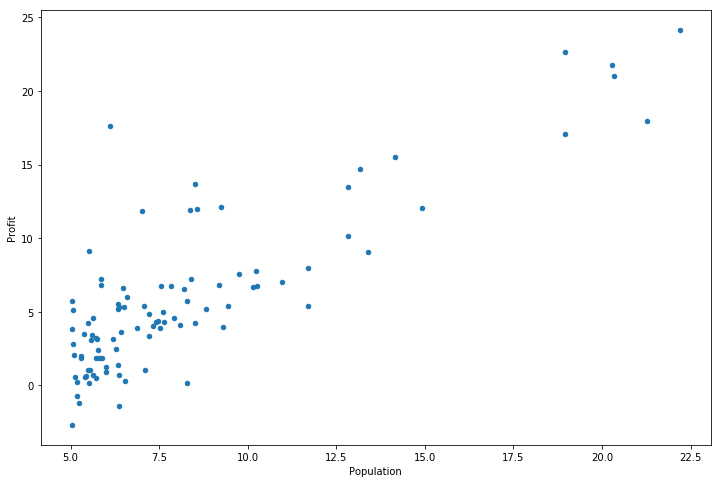

In [7]:
#Since 2-d, can view as scatterplot using plot() function (pandas wrapper for matplotlib)
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [8]:
#Define a cost function to calculate error (L2 loss function) (theta transpose for matrix multiplication)
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))


In [9]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)


In [10]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [11]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [12]:
#Shape of our matrices
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [13]:
#Testing our function. Not optimal yet because the parameters were just initialized to 0
computeCost(X, y, theta)

32.072733877455676

In [14]:
#Define a function to perform gradient descent on theta. Minimize cost.
#This computes the gradient of the error term in order to figure out whcih direction to move the parameter vector
#Aka calculating the changes to make to the parameters in-order-to reduce error to find optimal solution.
#alpha is the "Learning Rate" - How quickly the algorithm will converge
#iters is number of iterations
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [15]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [16]:
#We can quickly evaluate our regression model by taking a look at the total error.
#Not a very intuitive way to look at it, but definitely better than 32.
computeCost(X, y, g)

4.515955503078914

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

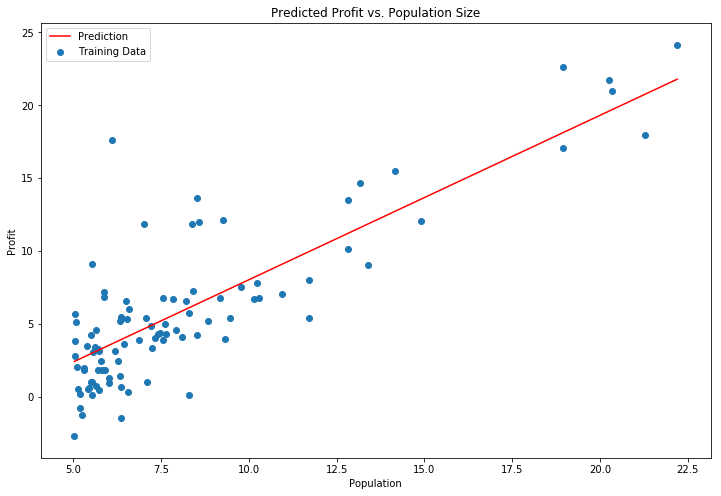

In [17]:
#Plot our best fit line on the scatterplot created above

#Define linspace to set up our plotting space
x = np.linspace(data.Population.min(), data.Population.max(), 100)

#Define best fit line
f = g[0, 0] + (g[0, 1] * x)

#Create plots
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')

#Define legend and axis
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

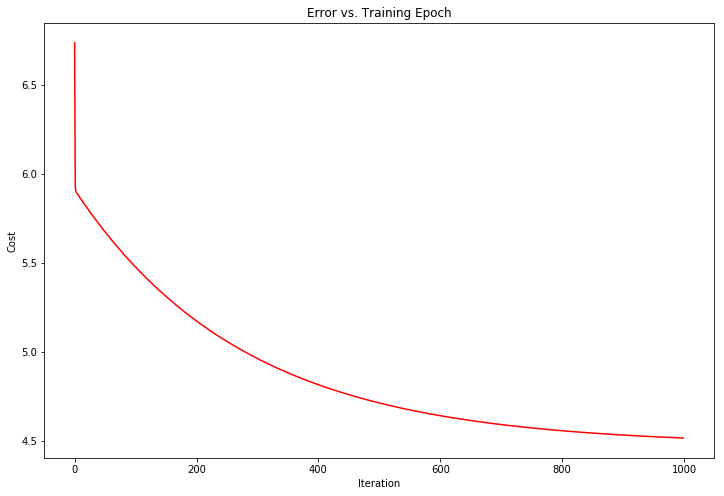

In [18]:
#Not too bad. We can also plot our cost at each iteration.

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Notice that it is always decreasing. This is an example of a convex optimization problem

In [22]:
#Now instead of making our own algorithms, we could use one of Python's packages
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

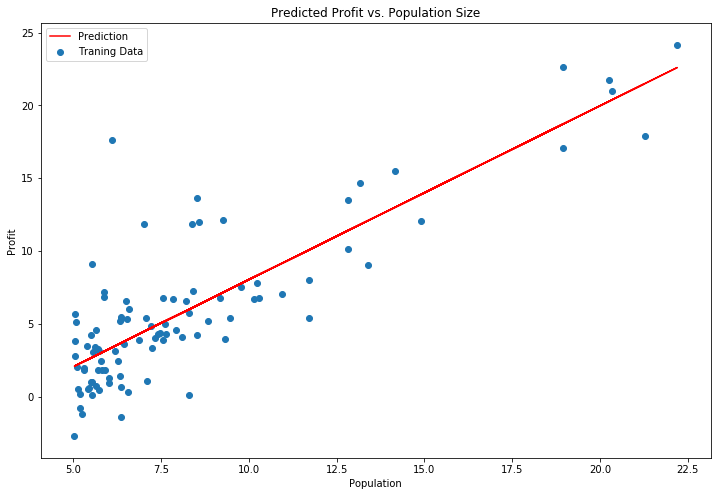

In [25]:
#And plotting the results from sklearn model
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')